In [22]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Data Source
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [24]:
# Load data in jupyter notebook
df = pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
384,2014,FORD,F150 FFV 4X4,PICKUP TRUCK - STANDARD,3.7,6,A6,E,20.2,15.3,18.0,16,288
901,2014,PORSCHE,PANAMERA,FULL-SIZE,3.6,6,AM7,Z,12.9,8.4,10.9,26,251
128,2014,BMW,X3 xDRIVE28i,SUV - SMALL,2.0,4,A8,Z,11.2,8.5,10.0,28,230
332,2014,FIAT,500 ABARTH CABRIO,MINICOMPACT,1.4,4,M5,X,8.5,6.9,7.8,36,179
868,2014,PORSCHE,911 CARRERA 4,MINICOMPACT,3.4,6,M7,Z,12.4,8.6,10.7,26,246


In [25]:
# Detailed explanation of data (mean, std, count)
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [27]:
# Finding correlation between variables
df_temp = df.copy()
df_temp = df_temp.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)
df_temp.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [28]:
# Selecting some important features that can influence the CO2 emission
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


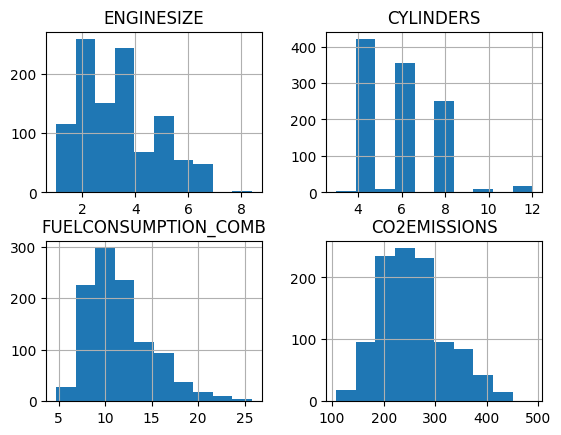

In [29]:
# Visualizing contribution of selected features on CO2 emission
viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show()

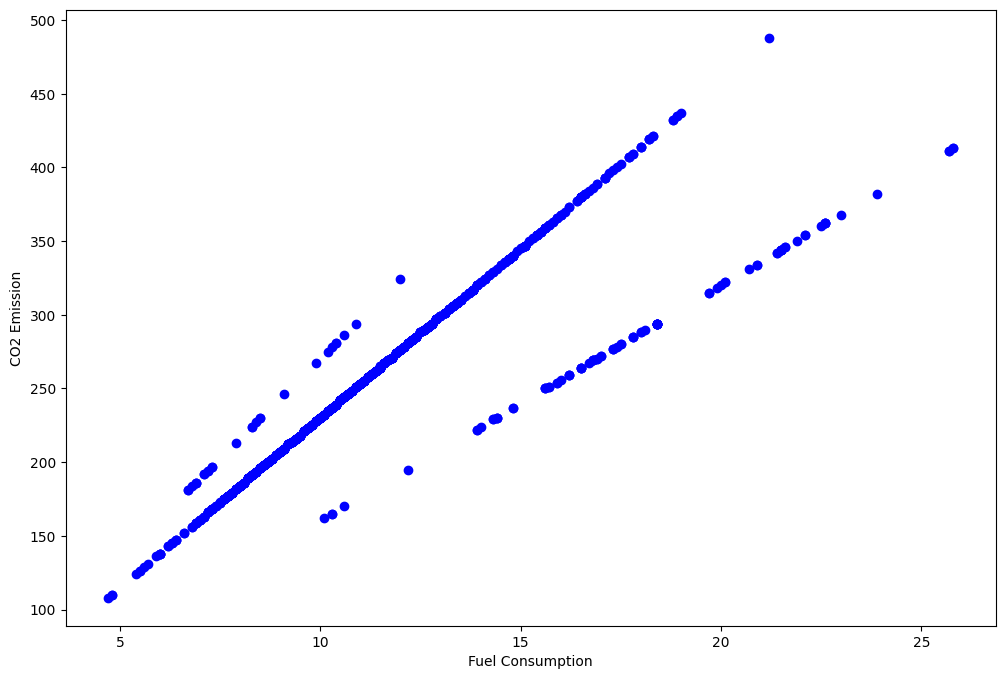

In [30]:
# More visualization
plt.figure(figsize=(12, 8))
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emission')
plt.show()

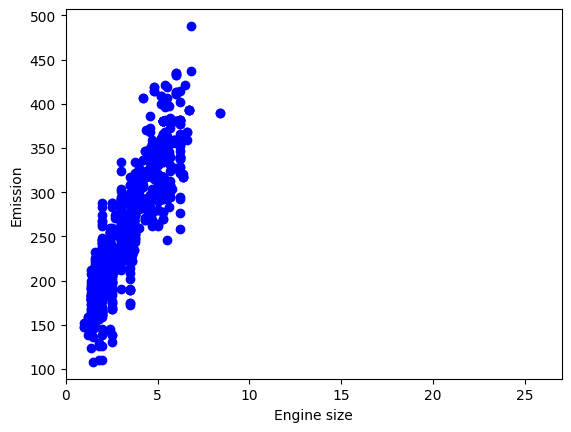

In [31]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

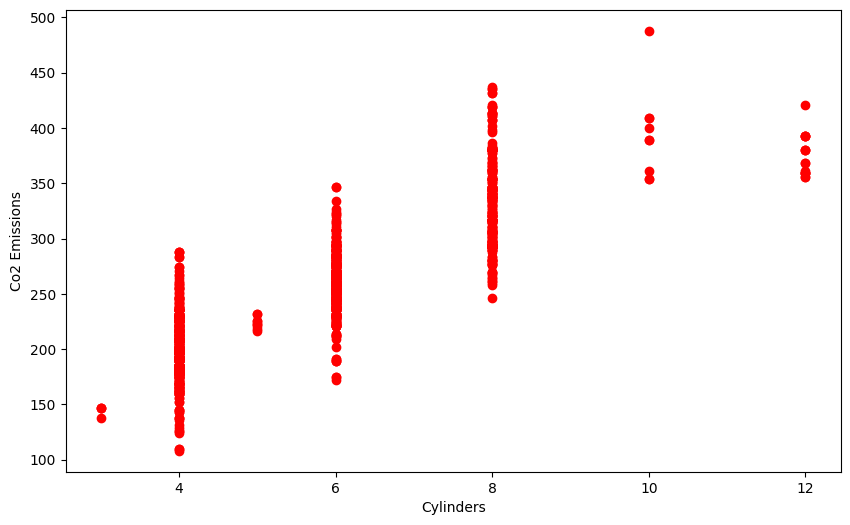

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(cdf['CYLINDERS'], cdf['CO2EMISSIONS'], color='red')
plt.xlabel('Cylinders')
plt.ylabel('Co2 Emissions')
plt.show()

In [33]:
# Lets choose one feature for simple linear regression (Uses one independent variable for target)
X = cdf.ENGINESIZE.to_numpy()
y = np.array(cdf.CO2EMISSIONS)

In [34]:
# Lets create train and test sets
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
type(X_train), np.shape(X_train), np.shape(y_train)

(numpy.ndarray, (853,), (853,))

In [52]:
# Building simple linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train)
print('Coefficients: ', regressor.coef_[0])
print('Intercept: ', regressor.intercept_)

Coefficients:  38.992978724434046
Intercept:  126.2897021740873


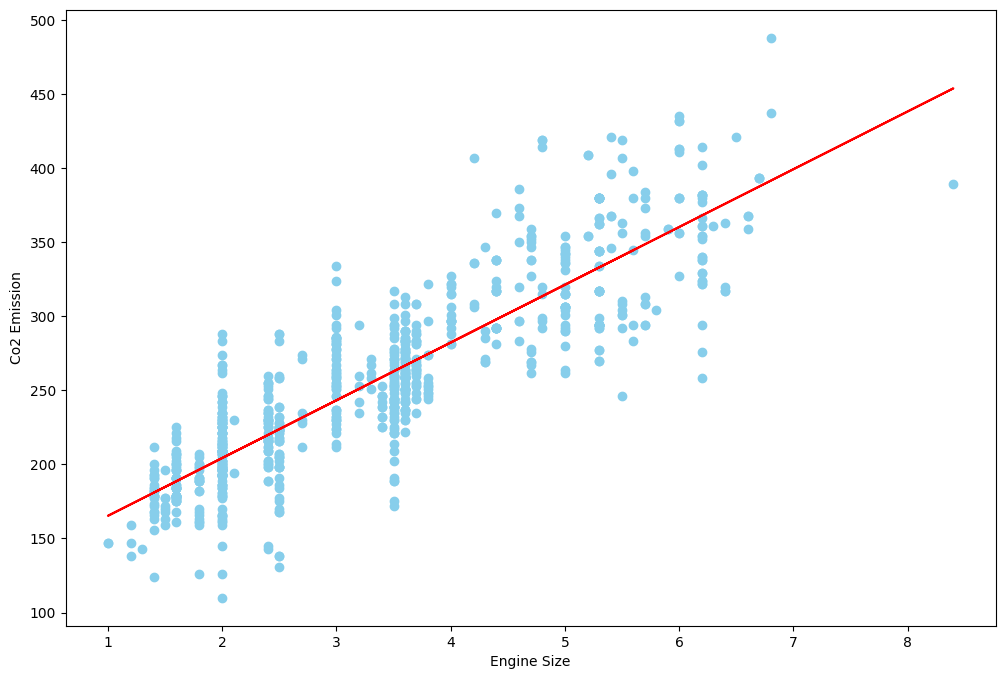

In [57]:
# Visualize model output
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, color='skyblue')
plt.plot(X_train, regressor.coef_*X_train+regressor.intercept_, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emission')
plt.show()

In [66]:
# Lets evaluate and predict the model
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score
y_test_ = regressor.predict(X_test.reshape(-1, 1))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test_, y_test))
print('Mean Squared Error: %.2f' % mean_squared_error(y_test_, y_test))
print(f'Root Mean Squared Error: {root_mean_squared_error(y_test_, y_test):.2f}')
print('R2-Score: %.2f' % r2_score(y_test_, y_test))

Mean absolute error: 24.10
Mean Squared Error: 985.94
Root Mean Squared Error: 31.40
R2-Score: 0.68
